In [67]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') #dark grid to plots

# to ignore red warnings
import warnings 
warnings.filterwarnings("ignore")


In [68]:
df = pd.read_csv("bankingFull.csv", sep=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


<h1><b>Exploration<b></h1>

<h4>Checking the features data types</h4>

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<h4>Generate descriptive statistics</h4>

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


I wanted to see the averages of the numeric columns, and their distributions.

<h4>Check for null values</h4>

In [71]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No null values which is good.

### <u>Exploratory Data Analysis - visualization</u>

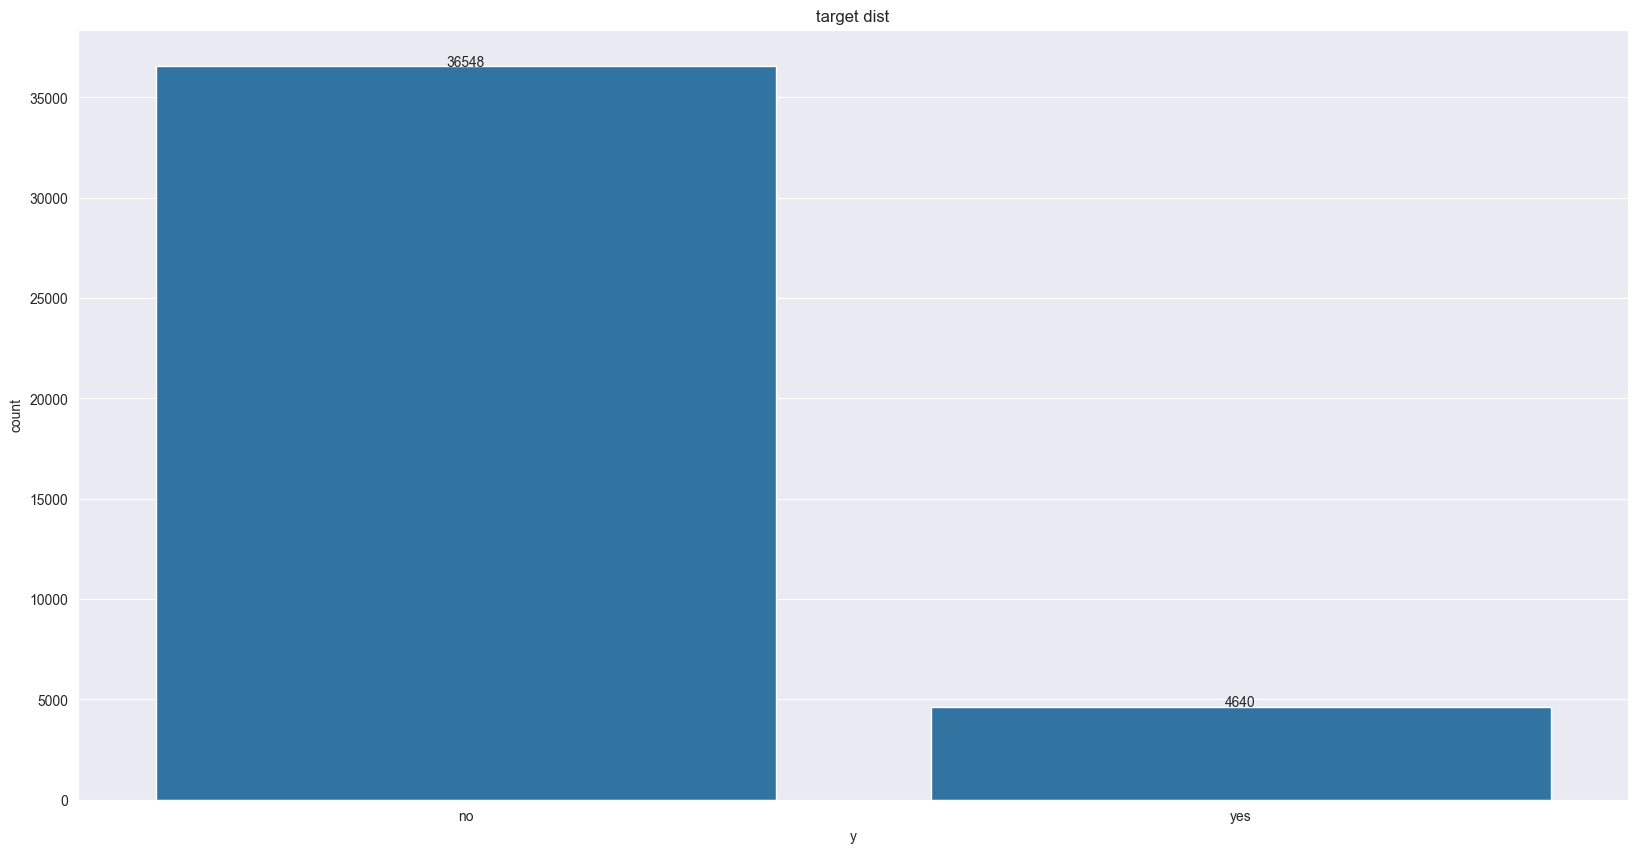

In [72]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x=df['y'])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 0.1, 
            int(p.get_height()), 
            ha="center")
plt.title("target dist")
plt.show();

we should balance the data by the "y" column to get more accurate results.

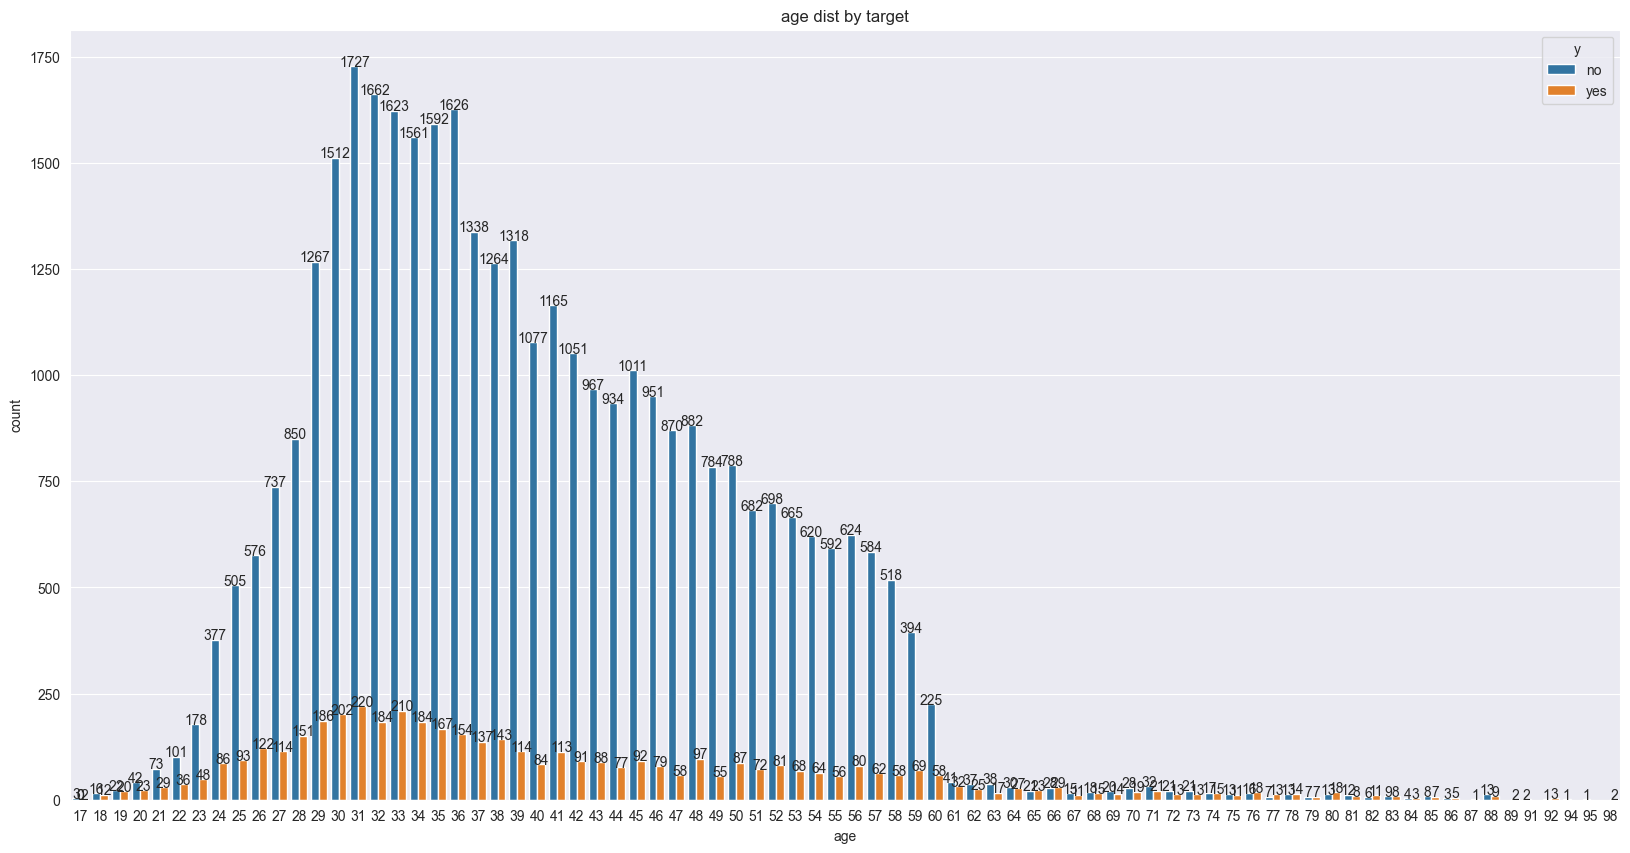

In [73]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x=df['age'],hue=df['y'])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 0.1, 
            int(p.get_height()), 
            ha="center")
plt.title("age dist by target")
plt.show();

there are a few outliars at the older age.<br>
the distribution isn't simetric and most of our data is about the age of 25 to 55.<br>
and we can see that above age 60 the proportion of those who said yes is higher.

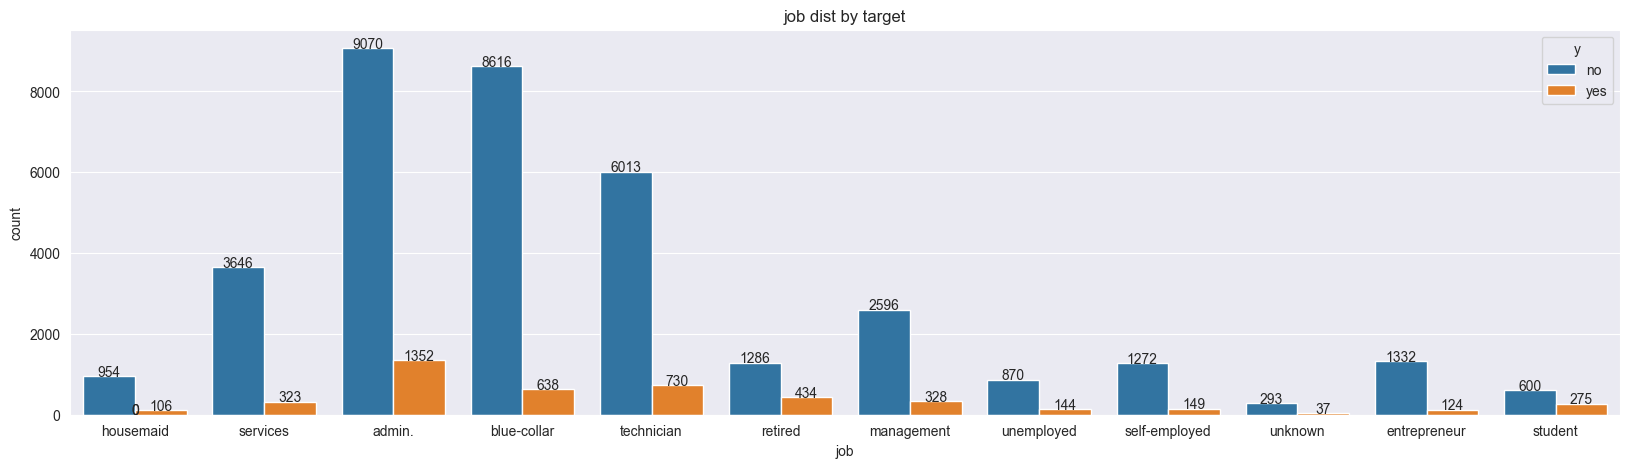

In [74]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x=df['job'],hue=df['y'])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 0.1, 
            int(p.get_height()), 
            ha="center")
plt.title("job dist by target")
plt.show();

a very small amount of unknown data, we will fill it randomly.

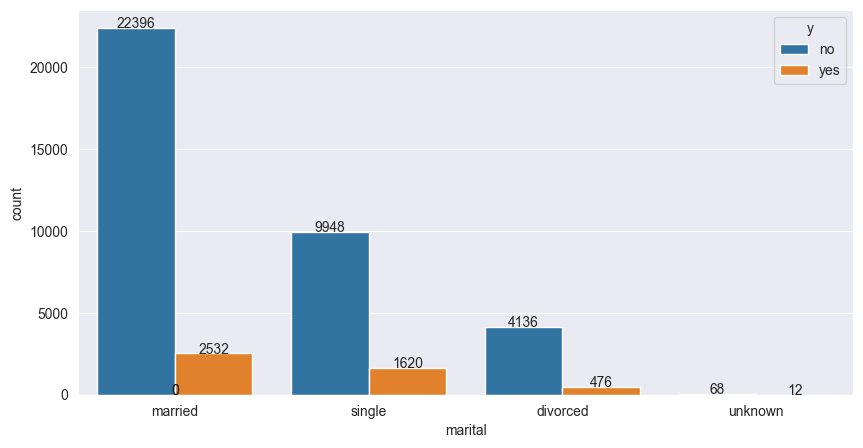

In [75]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x=df['marital'],hue=df['y'])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 0.1, 
            int(p.get_height()), 
            ha="center")
plt.show()

In [76]:
df['marital'].value_counts()['unknown'] / len(df)

0.0019423132951345051

we can see that we have some unknown values, so i want to fill them.<br>
because we have very small amount of those values (~0.002%), i'll fill them with the mode value.(in the manipulation section)

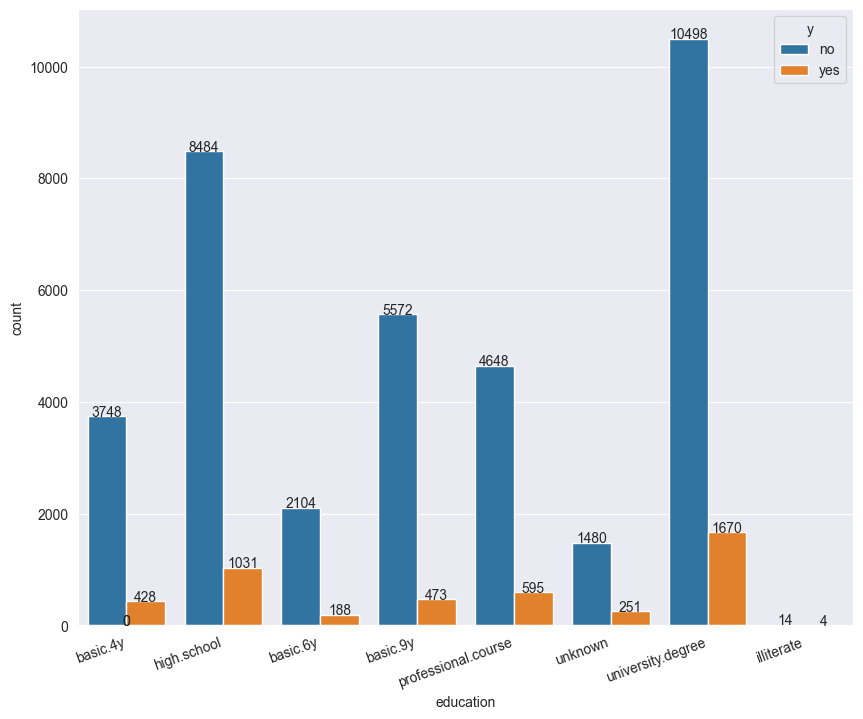

In [77]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x=df['education'],hue=df['y'])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 0.1, 
            int(p.get_height()), 
            ha="center")
plt.xticks(rotation=20, ha='right')
plt.show()

In [78]:
df['education'].value_counts()['unknown'] / len(df)

0.042026803923472855

here like in the marital feature we will fill the unknown with a mode value. (in the manipulation section)
Most of our data has people who have atleast 12 year's of aducation and higher.

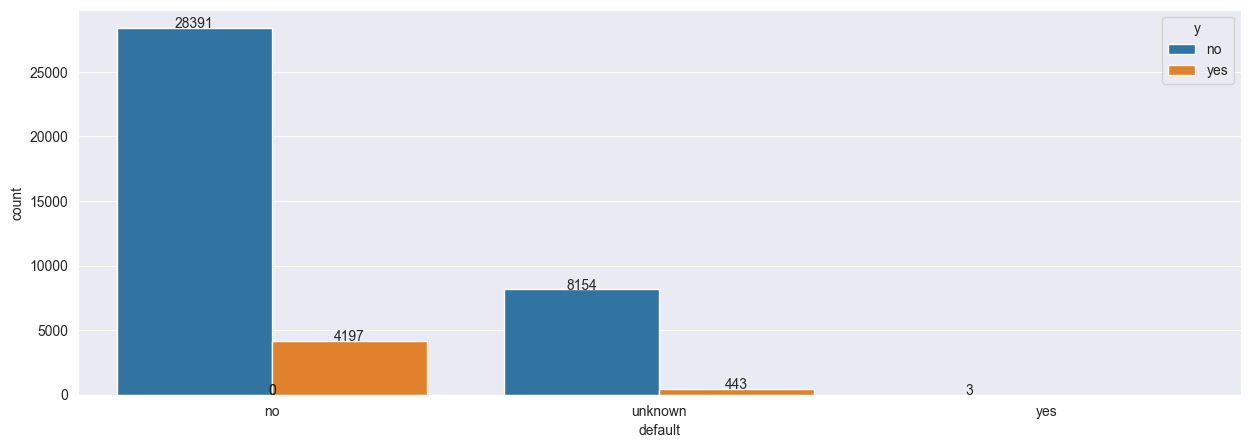

In [79]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=df['default'],hue=df['y'])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 0.1, 
            int(p.get_height()), 
            ha="center")

plt.show()

we have an highly imbalanced distribution, a lot of "no"s , a little "unknown"s and just 3 "yes"s. <br>
this indicates low predictive power because the model will not have something to compare the records with "no"s,<br>
so i will remove this column.

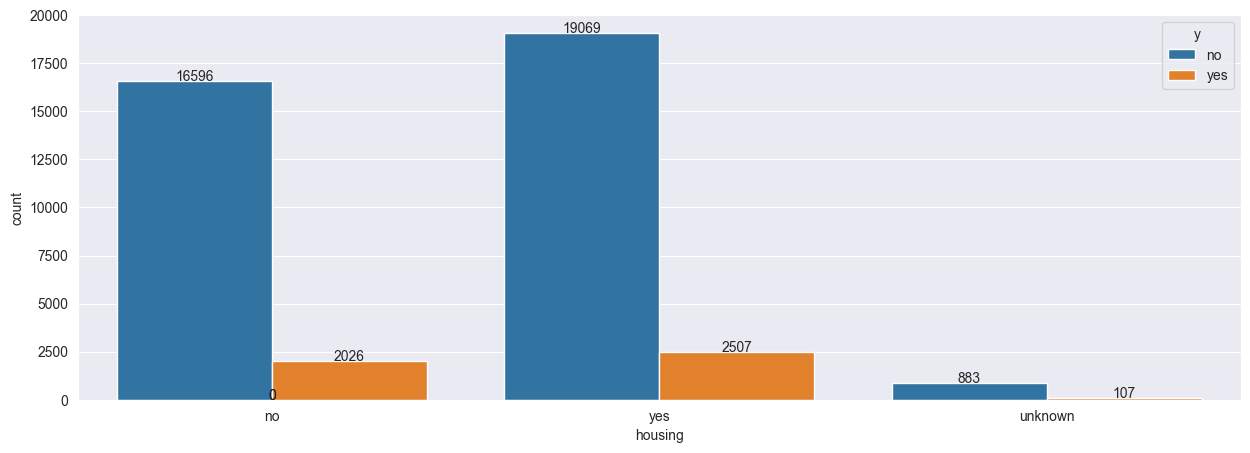

In [80]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=df['housing'],hue=df['y'])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 0.1, 
            int(p.get_height()), 
            ha="center")

plt.show()

here we'll fill the unknown values with mode.<br>
we can see the proportion of those who have housing and said yes is equal to those who dont have housing and said yes.

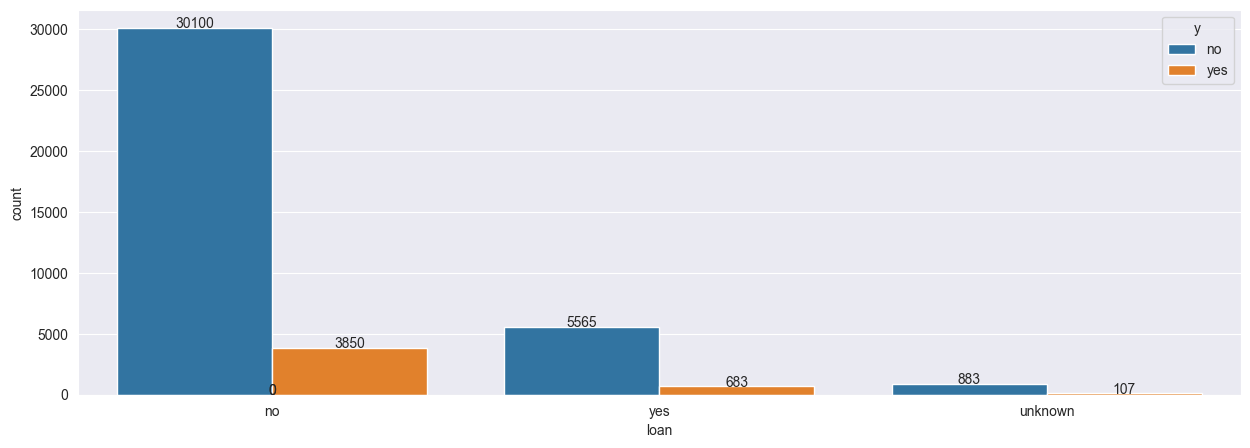

In [81]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=df['loan'],hue=df['y'])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 0.1, 
            int(p.get_height()), 
            ha="center")

plt.show()

here we'll fill the unknown values randomly.<br>
we can see the proportion of those who have loan and said yes is equal to those who dont have loan and said yes.

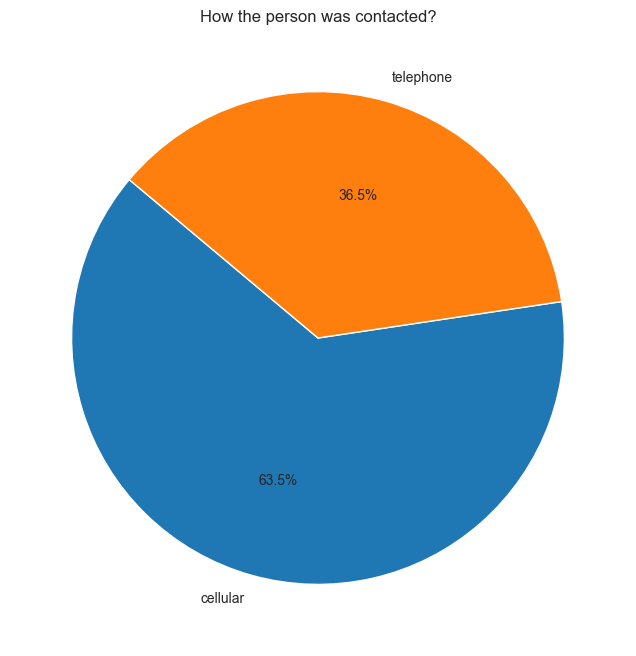

In [82]:
contact = df['contact'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(contact, labels=contact.index, autopct='%1.1f%%', startangle=140)
plt.title('How the person was contacted?')

plt.show()

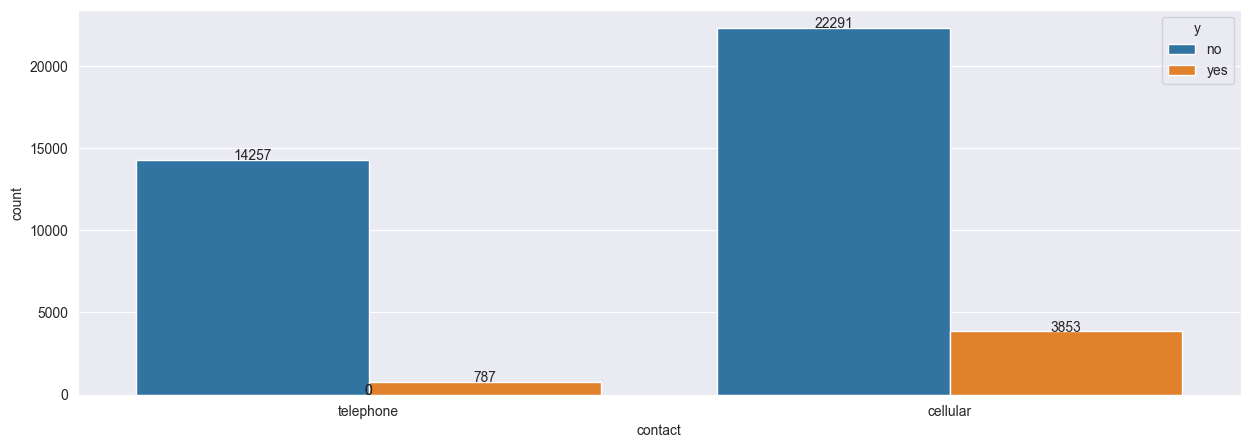

In [83]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=df['contact'],hue=df['y'])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 0.1, 
            int(p.get_height()), 
            ha="center")

plt.show()

i have no domain knowledge but i think that this feature may have limited direct impact on whether the client subscribes.<br>
we'll consider removing after testing.

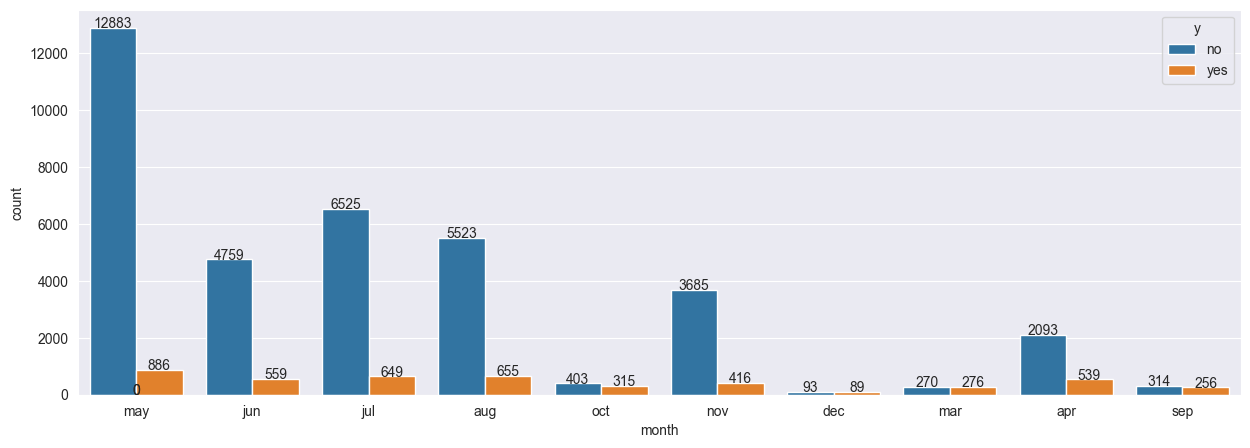

In [84]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=df['month'],hue=df['y'])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 0.1, 
            int(p.get_height()), 
            ha="center")

plt.show()

although we have there small amount of data we can see that months oct, dec, mar and sep have the highest proportion of subscribers. 

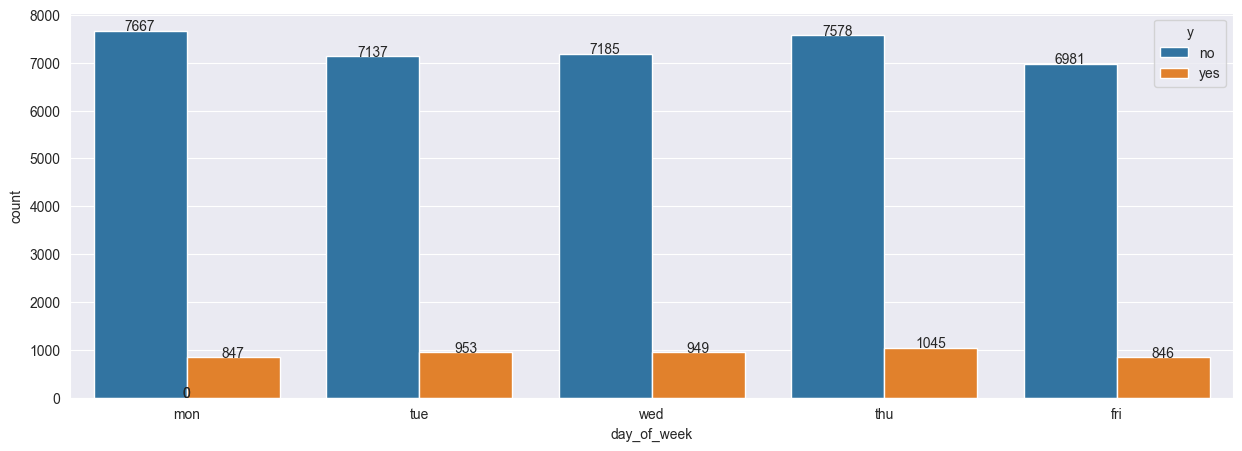

In [85]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=df['day_of_week'],hue=df['y'])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 0.1, 
            int(p.get_height()), 
            ha="center")

plt.show()

an evenly distributed feature, high entropy, but cant say that this feature help's to predict the y.<br>
will consider removing.

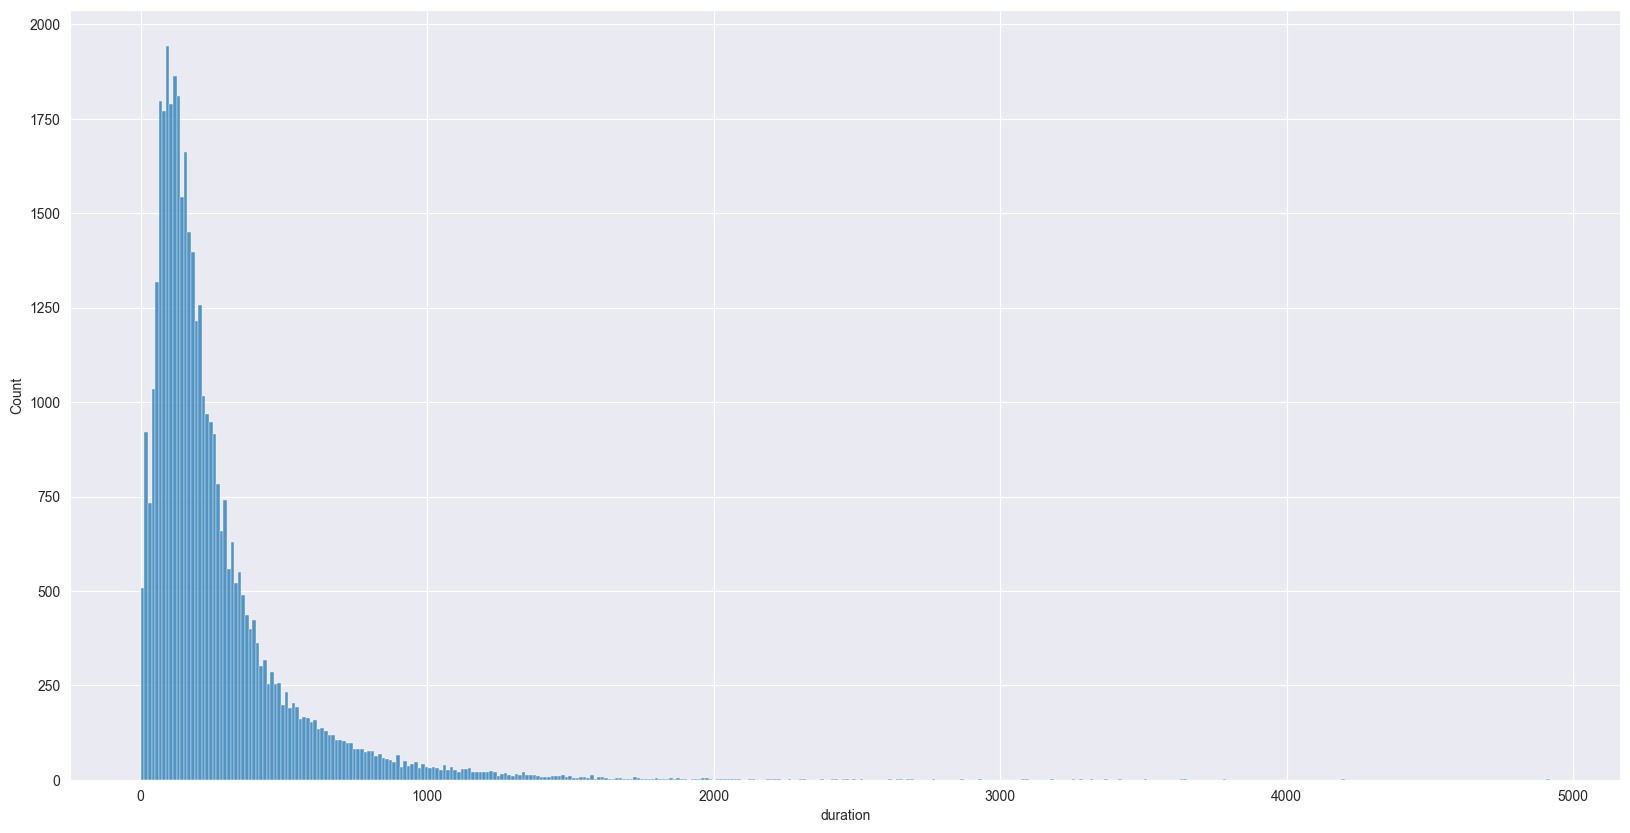

In [86]:
plt.figure(figsize=(20,10))
sns.histplot(df['duration']);

here we have a right skewd distribution with some outliars.

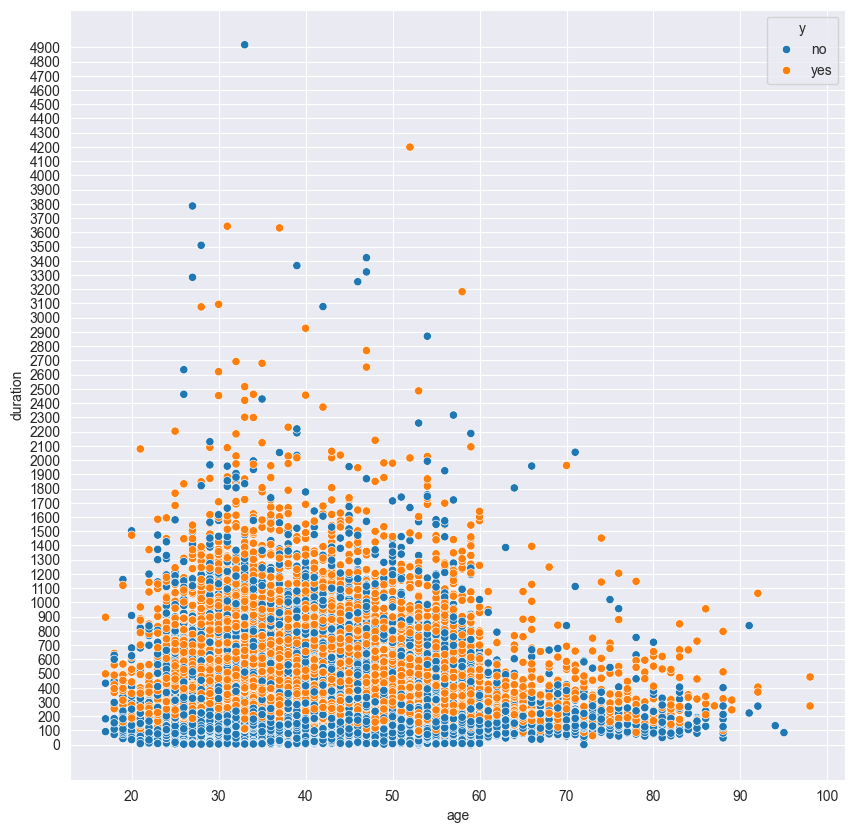

In [87]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='age', y='duration', hue='y', data=df)

y_min, y_max = df['duration'].min(), df['duration'].max()
plt.yticks(range(int(y_min), int(y_max) + 1, 100));

we can see that less then 100 sec of call duration the chances to get a "yes" are really small.


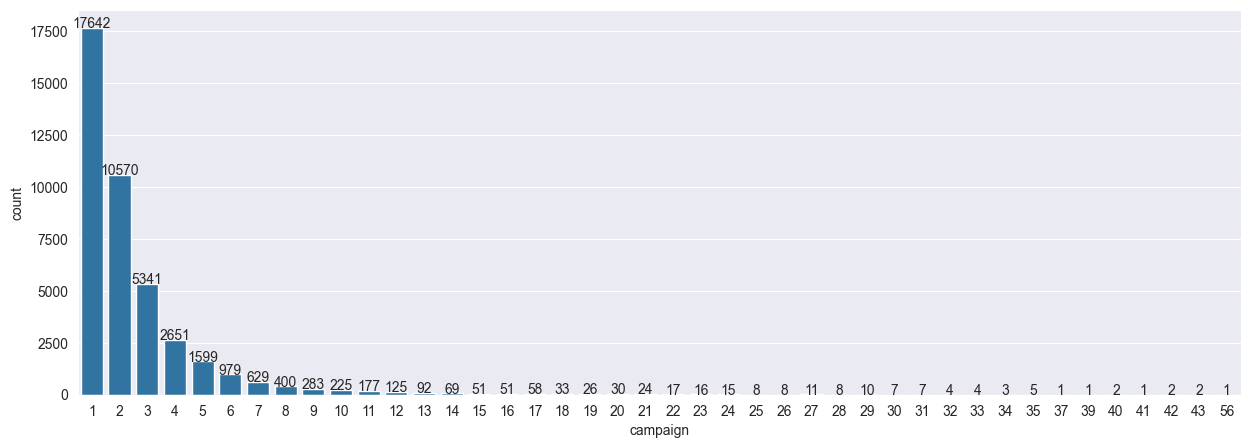

In [88]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=df['campaign'])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 0.1, 
            int(p.get_height()), 
            ha="center")

plt.show()

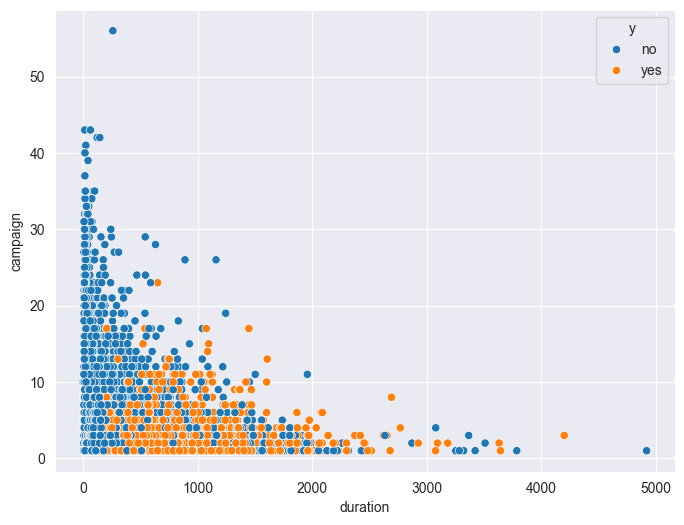

In [89]:
plt.figure(figsize=(8,6))
sns.scatterplot(x= 'duration', y= 'campaign',hue='y',data=df);

when the campaign is above 20 we can say that the odds to get a yes is very small.


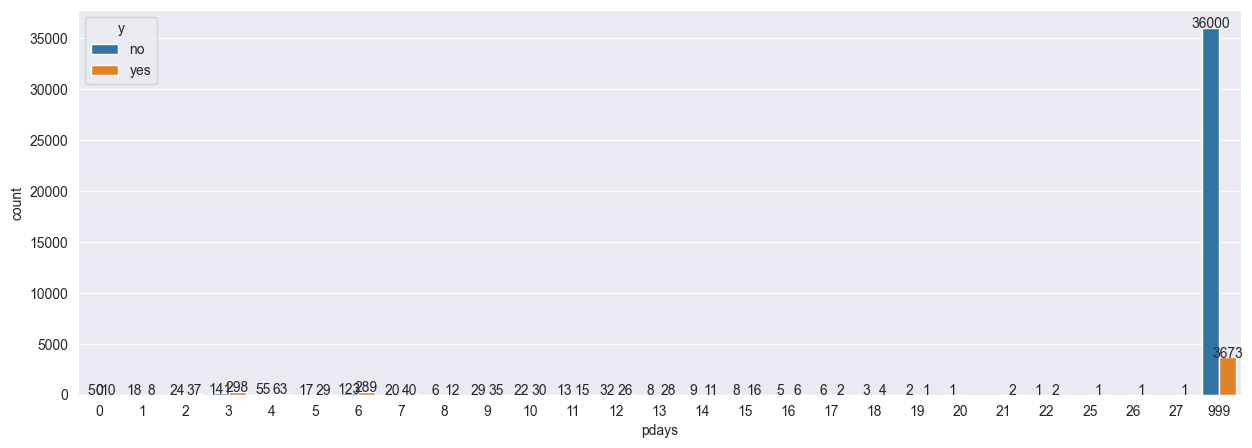

In [90]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=df['pdays'],hue=df["y"])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 0.1, 
            int(p.get_height()), 
            ha="center")

plt.show()

we can see that the value 999 appearing 39,673 times.<br/>
this value means that the client was not previously contacted.<br/>
The remaining values represent meaningful information about how recently the client was contacted, but there very few of those.<br/>
we can change the column values to a binary column: if 999: 0, else: 1. (we will do it in the manipulation section)<br>
also we will consider to remove this column.

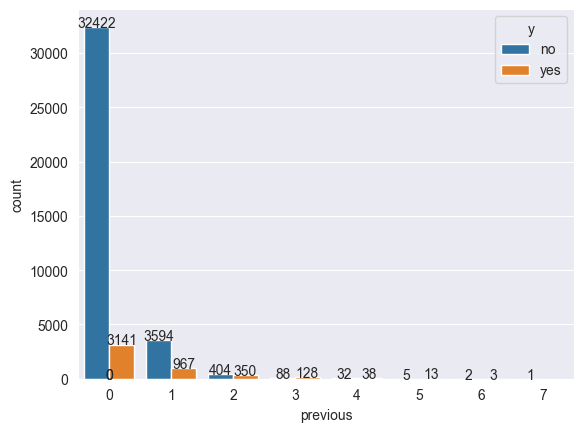

In [91]:
# plt.figure(figsize=(8,5))
ax = sns.countplot(x=df['previous'],hue=df["y"])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 0.1, 
            int(p.get_height()), 
            ha="center")

plt.show()

the most of the people have not contacted before the campaign. <br>
also we can see that its raising odds to make atleast 2 contacts with the clients before the campaign.


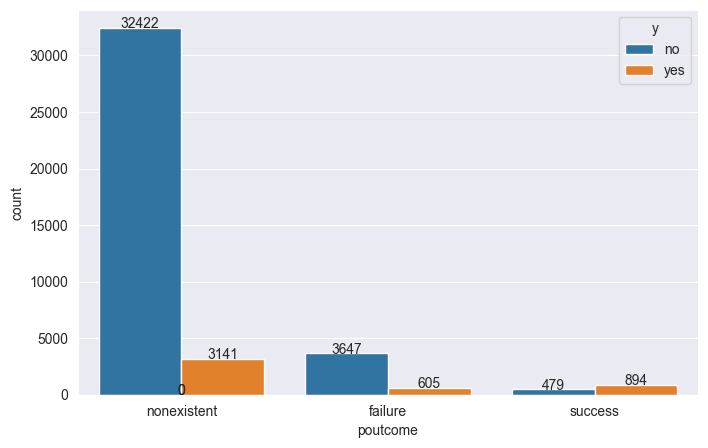

In [92]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x=df['poutcome'],hue=df["y"])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 0.1, 
            int(p.get_height()), 
            ha="center")

plt.show()

if the previous campaigns outcome with the client wae a success, there is a higher chanse to success in the current campaign.
 

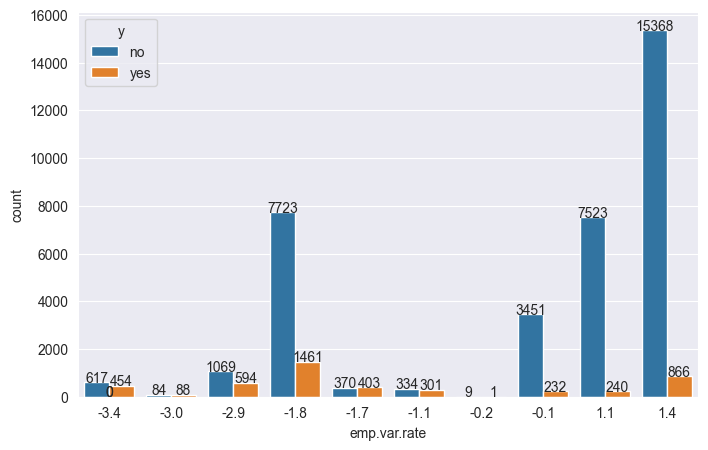

In [93]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x=df['emp.var.rate'],hue=df['y'])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 0.1, 
            int(p.get_height()), 
            ha="center")

plt.show()

when the emp.var.rate is under -1 we can say that the chance to success in the campaign is higher.


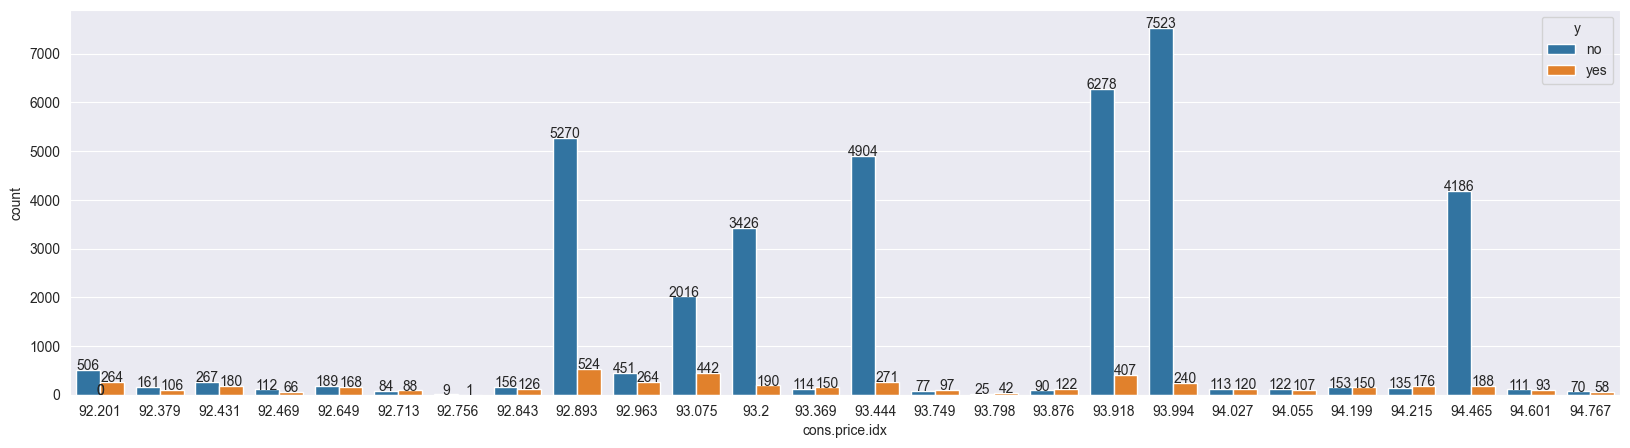

In [94]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x=df['cons.price.idx'], hue=df["y"])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 0.1, 
            int(p.get_height()), 
            ha="center")

plt.show()

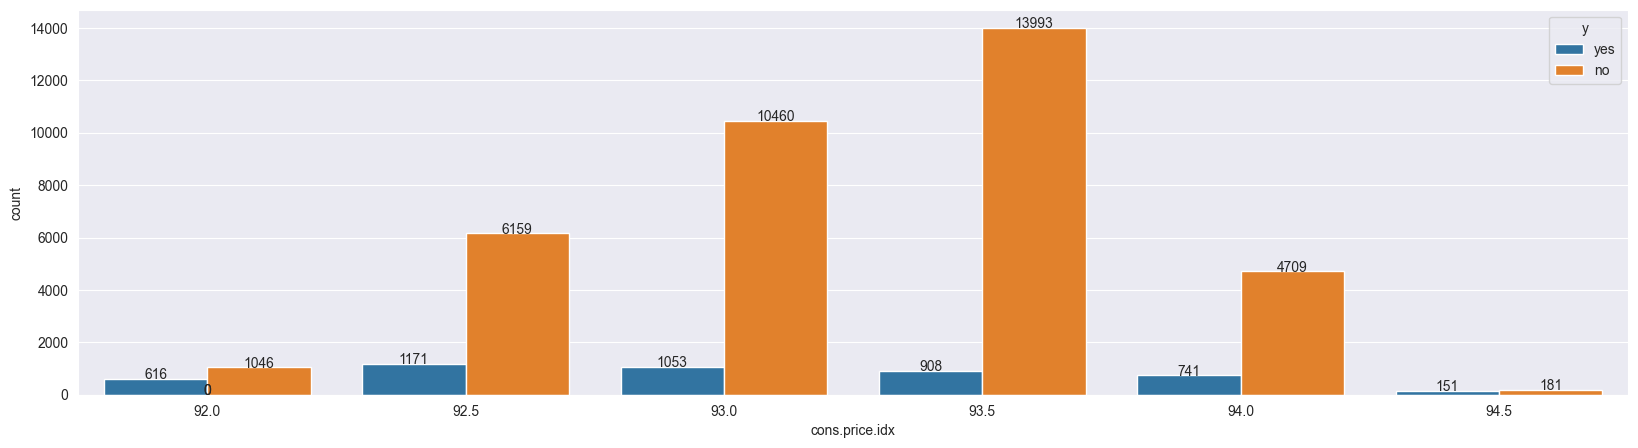

In [95]:
def categorize_price(x):
    for boundary in [92, 92.5, 93, 93.5, 94, 94.5]:
        if boundary < x < boundary + 0.5:
            return boundary
    return x  

plt.figure(figsize=(20,5))
ax = sns.countplot(x=df["cons.price.idx"].apply(categorize_price), hue=df["y"])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 0.1, 
            int(p.get_height()), 
            ha="center")

plt.show()

when cons.price.idx lower then 92.5 or higher then 94 there more chanses to success

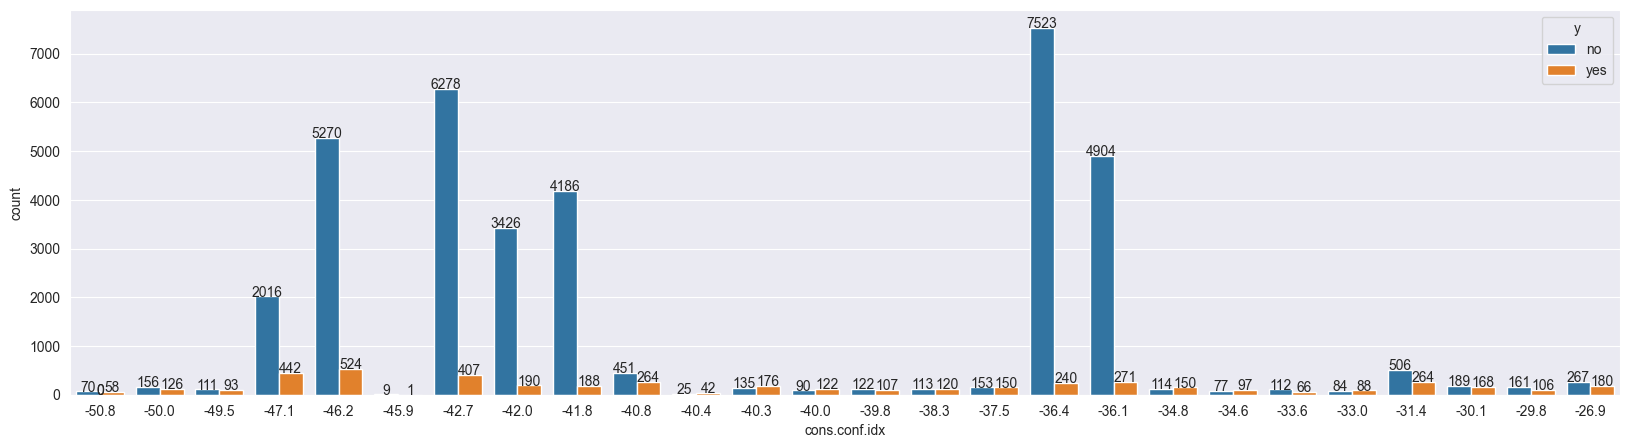

In [96]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x=df['cons.conf.idx'],hue=df["y"])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 0.1, 
            int(p.get_height()), 
            ha="center")

plt.show()

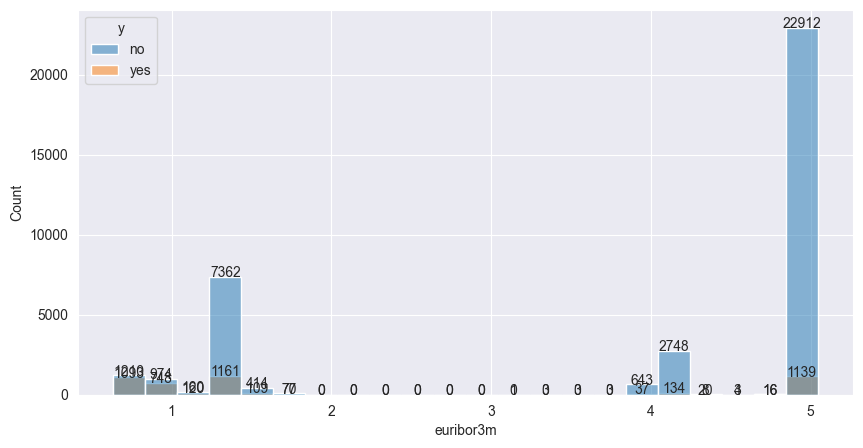

In [97]:
plt.figure(figsize=(10,5))
ax = sns.histplot(x=df['euribor3m'],hue=df["y"])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 0.1, 
            int(p.get_height()), 
            ha="center")
plt.show()

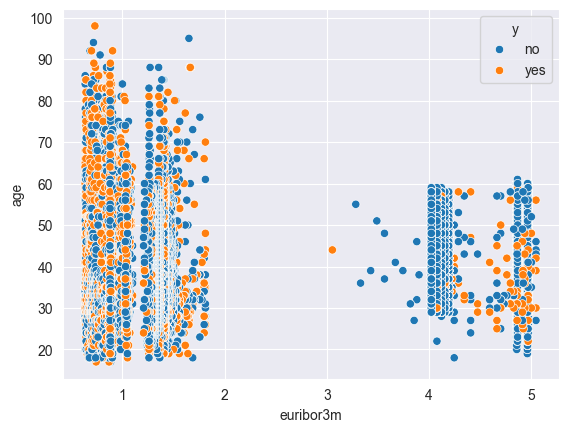

In [98]:
ax = sns.scatterplot(x=df['euribor3m'],y=df["age"],hue=df['y'])

more chanses to get a yes when the euribor3m is lower.


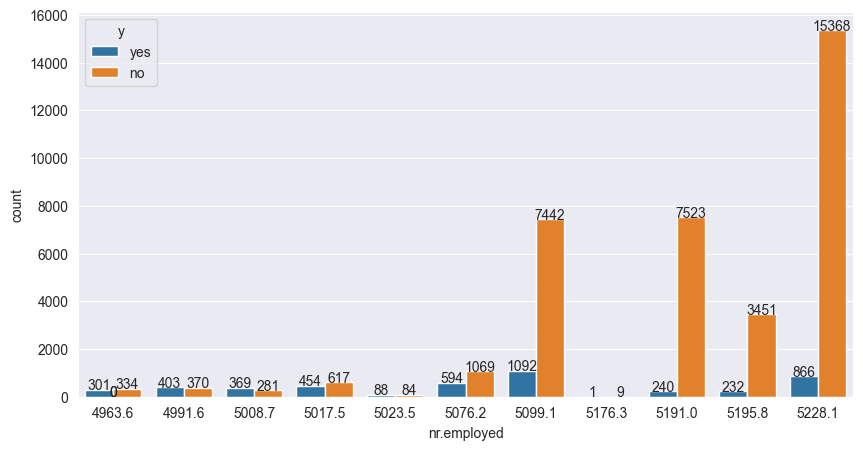

In [99]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x=df['nr.employed'],hue=df['y'])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 0.1, 
            int(p.get_height()), 
            ha="center")
plt.show()

for the last 5 features, we should consider categorialize them into binnes based on domain knowledge and see how it affects the model accuaracy  

<Axes: >

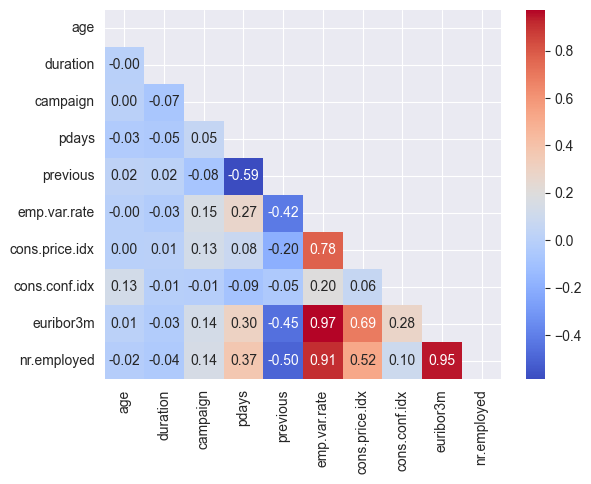

In [100]:
mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype=bool))
sns.heatmap(df.corr(numeric_only=True),mask=mask,cmap="coolwarm",annot=True,fmt=".2f")

pdays - previous: negative pretty high corr, will consider removing the pdays.<br>
euribor3m, nr.employed - emp.var.rate: high positive corr, will consider removing the euribor3m<br>

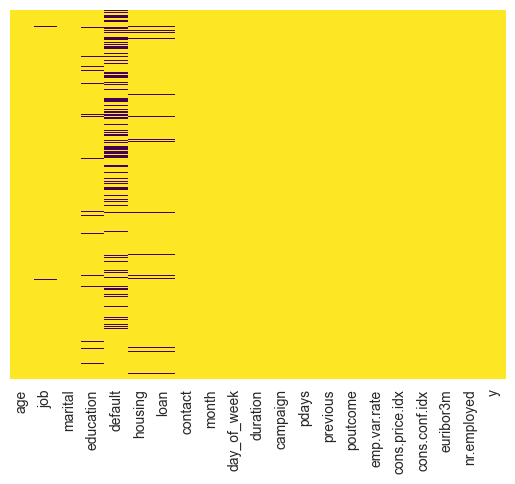

In [101]:
have_unknown = df == "unknown"
sns.heatmap(have_unknown,cmap="viridis_r",yticklabels=False,cbar=False);

<h1><b>Manipulation</b></h1>

In [102]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### Split the data to X and y

In [103]:
X = df.drop('y',axis=1)
y = df['y']

#### removing the default column

In [104]:
X = X.drop('default',axis=1)

#### Doing trial and error on droping some of the columns and check the results fot under/over fitting

In [105]:
# X = X.drop('emp.var.rate',axis=1)
# X = X.drop('day_of_week',axis=1)
# X = X.drop('contact',axis=1)
# X = X.drop('pdays',axis=1)
# X = X.drop('poutcome',axis=1)

#### filling the unknown values with mode

In [106]:
for col in X.columns:
    mode_value = X[col].mode()[0]
    X[col] = X[col].replace('unknown', mode_value)

#### changing the pdays column to a previously_contacted binary column (999 = 0, other = 1)

In [107]:
X['pdays'] = X['pdays'].apply(lambda x: 0 if x == 999 else 1)
X.rename(mapper={'pdays':'previously_contacted'},axis=1,inplace=True)
X['previously_contacted'].value_counts()

previously_contacted
0    39673
1     1515
Name: count, dtype: int64

In [108]:
X = pd.get_dummies(X,drop_first=True)

#### balancing the data by up/down sampling

In [109]:
from imblearn.combine import SMOTETomek

# Initialize the SMOTETomek object
smote_tomek = SMOTETomek()

# Fit and resample the data
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Print the original and new class distributions
print("Original class distribution:")
print(y.value_counts())
print("\nResampled class distribution:")
print(y_resampled.value_counts())

# Update X and y with balanced data
X_final = X_resampled
y = y_resampled

Original class distribution:
y
no     36548
yes     4640
Name: count, dtype: int64

Resampled class distribution:
y
no     36257
yes    36257
Name: count, dtype: int64


<h1><b> Algorithm </b></h1>

#### Spliting the data to training set and test set - 30% test size


In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_final,y,test_size=0.3)

#### Scaling the data


In [111]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h1><b> Logistic Regression </b></h1>


In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#### Using cross validation folds to find the best parameters, instantiate the model object and fit the train set


In [113]:
param_grid = {'C':[0.1,0.5,0.75,1,2],
              'solver':['newton-cg','sag','saga','lbfgs','liblinear'],
              'max_iter':[50,100,200],
              'n_jobs':[-1]}

logreg = LogisticRegression()
grid_logreg = GridSearchCV(logreg,param_grid,verbose=3,scoring='accuracy')
grid_logreg.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, max_iter=50, n_jobs=-1, solver=newton-cg;, score=0.926 total time=   1.3s
[CV 2/5] END C=0.1, max_iter=50, n_jobs=-1, solver=newton-cg;, score=0.926 total time=   0.8s
[CV 3/5] END C=0.1, max_iter=50, n_jobs=-1, solver=newton-cg;, score=0.931 total time=   0.8s
[CV 4/5] END C=0.1, max_iter=50, n_jobs=-1, solver=newton-cg;, score=0.928 total time=   0.8s
[CV 5/5] END C=0.1, max_iter=50, n_jobs=-1, solver=newton-cg;, score=0.928 total time=   0.9s
[CV 1/5] END C=0.1, max_iter=50, n_jobs=-1, solver=sag;, score=0.926 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=50, n_jobs=-1, solver=sag;, score=0.925 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=50, n_jobs=-1, solver=sag;, score=0.931 total time=   0.2s
[CV 4/5] END C=0.1, max_iter=50, n_jobs=-1, solver=sag;, score=0.928 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=50, n_jobs=-1, solver=sag;, score=0.928 total time=   0.1s
[CV 1/5] END C=0.1, max_iter

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 0.75, 1, 2],
                         'max_iter': [50, 100, 200], 'n_jobs': [-1],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs',
                                    'liblinear']},
             scoring='accuracy', verbose=3)

#### The best parameters

In [114]:
grid_logreg.best_params_

{'C': 2, 'max_iter': 50, 'n_jobs': -1, 'solver': 'newton-cg'}

#### Fitting the algorithm with the best parameters

In [120]:
logreg = LogisticRegression(C=2,max_iter=50,solver='newton-cg')
logreg.fit(X_train,y_train)

LogisticRegression(C=2, max_iter=50, solver='newton-cg')

#### Predicting class labels for samples in x_test 


In [121]:
pred = logreg.predict(X_test)

#### Printing the accuracy for the training set


In [122]:
logreg.score(X_train,y_train)*100

93.26424870466322

#### Printing the accuracy for the test set


In [123]:
logreg.score(X_test,y_test)*100

93.56469777062745

In [124]:
coefficients = logreg.coef_[0]
odds_ratios = np.exp(coefficients)


feature_importance = pd.DataFrame({
    'Feature': X_final.columns,
    'Coefficient': np.abs(coefficients),
    'Odds Ratio': odds_ratios
})
print("\nFeature Importance (Coefficient and Odds Ratio):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))



Feature Importance (Coefficient and Odds Ratio):
                          Feature  Coefficient    Odds Ratio
1                        duration    23.178306  1.164690e+10
5                    emp.var.rate     7.315284  6.652926e-04
2                        campaign     4.896743  7.470874e-03
6                  cons.price.idx     4.727482  1.130106e+02
27    education_university.degree     3.053241  2.118389e+01
45               poutcome_success     3.025503  2.060437e+01
35                      month_mar     3.015508  2.039944e+01
25           education_illiterate     2.650133  1.415591e+01
24          education_high.school     2.620663  1.374484e+01
26  education_professional.course     2.302786  1.000201e+01
31                      month_aug     2.281670  9.793020e+00
14                    job_retired     2.086896  8.059857e+00
9                     nr.employed     2.025141  7.577177e+00
23             education_basic.9y     1.963751  7.126009e+00
22             education_basic.6y  

<h1><b>Conclutions for the Department Manager<b></h1>

<h3>Data Insights</h3>
<p>Through data exploration, several key findings emerged:</p>
<ul>
    <li><strong>Balancing the Data:</strong> Balancing the "y" column is necessary to achieve more accurate results.</li>
    <li><strong>Age and Outcome:</strong> Customers over age 60 have a higher likelihood of saying "yes."</li>
    <li><strong>Euribor3m:</strong> Lower euribor3m values correlate with higher chances of a positive outcome.</li>
    <li><strong>Employment Variation Rate:</strong> When this rate is below -1, the likelihood of a successful campaign increases.</li>
    <li><strong>Previous Campaign Success:</strong> If the client had a successful outcome in prior campaigns, the chance of success in the current campaign is higher.</li>
    <li><strong>Contact Frequency:</strong> Making at least two contacts with clients before the campaign increases the odds of success.</li>
    <li><strong>High Campaign Counts:</strong> Campaigns with more than 20 contacts have very low odds of success.</li>
    <li><strong>Call Duration:</strong> Calls shorter than 100 seconds have a significantly reduced chance of a "yes."</li>
    <li><strong>Seasonality:</strong> October, December, March, and September have the highest proportion of subscribers.</li>
</ul>

<h3>Model Performance</h3>
<p><strong>High Accuracy:</strong></p>
<ul>
    <li>93.2% accuracy on the training set.</li>
    <li>93.5% accuracy on the test set.</li>
</ul>
<p>These metrics demonstrate the model’s ability to consistently make accurate predictions, without signs of overfitting or underfitting.</p>

<p><strong>Well-Prepared Data:</strong> The dataset was well-organized, requiring minimal preprocessing to achieve strong performance.</p>

<h3>Top Contributing Features</h3>
<p>The following features had the greatest impact on the model's accuracy:</p>
<ul>
    <li>Duration</li>
    <li>emp.var.rate</li>
    <li>cons.price.idx</li>
    <li>Campaign</li>
    <li>month_mar</li>
    <li>euribor3m</li>
    <li>poutcome_success</li>
    <li>previously_contacted</li>
</ul>

<h3>Removed Features</h3>
<p><strong>Default:</strong> This feature had an extremely imbalanced distribution and did not significantly contribute to the model's performance.</p>

<h3>Recommendations for Improvement</h3>
<ul>
    <li><strong>Expand the Dataset:</strong> Collect more data to improve the model’s generalizability.</li>
    <li><strong>Incorporate Additional Features:</strong> Explore adding new features such as:
        <ul>
            <li>Temporal data (e.g., time of day, weekday).</li>
            <li>Behavioral data (e.g., browsing habits, previous interactions).</li>
            <li>Extended customer history (e.g., tenure, past purchases).</li>
        </ul>
    </li>
    <li><strong>Refine Customer Segmentation:</strong> Analyze specific customer subgroups for more tailored insights.</li>
</ul>

<h3>Next Steps: Implementation and Deployment</h3>
<p>The model is ready for deployment in a business environment to predict which customers are likely to open a fixed deposit.</p>
<ul>
    <li><strong>Integration:</strong> The model can be embedded into marketing decision-making systems to improve targeting and campaign efficiency.</li>
    <li><strong>Impact Evaluation:</strong> Monitor the model's effect on business performance and adjust as needed for continuous improvement.</li>
</ul>